In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from time import strftime
import tensorflow as tf
import keras
import requests
import json
import pickle
from flask import Flask, request, jsonify
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
#from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten, Conv2D, MaxPooling2D
from keras.layers import *
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
%reload_ext tensorboard
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('employees (1) (1) (1) (2).csv')
data

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure,Agency,EmployeeName,age,rating,salary.1,fname,lname
0,221,engineering,0.932868,4,low,0.829896,Left,5.0,"South Gate, New York",NATHANIEL FORD,43,1.4,567595,NATHANIEL,FORD
1,232,support,NaN,3,low,0.834544,Employed,2.0,"Miami Gardens, Iowa",Rohan Rane,47,2.2,538909,Rohan,Rane
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0,"Danville, Florida",ALBERT PARDINI,38,4.7,335279,ALBERT,PARDINI
3,206,sales,0.575688,4,low,0.424764,Employed,2.0,"Hallandale Beach, Texas",CHRISTOPHER CHONG,39,4.8,332343,CHRISTOPHER,CHONG
4,249,sales,0.845217,3,low,0.779043,Employed,3.0,"North Richland Hills, Massachusetts",PATRICK GARDNER,33,4.3,326373,PATRICK,GARDNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,266,support,0.803680,4,medium,0.920262,Employed,3.0,"Fremont, California",DENISE PIERI,48,3.5,81432,DENISE,PIERI
13995,162,engineering,0.714147,5,medium,0.544542,Employed,3.0,"West Des Moines, Ohio",LOURDES TORRES,37,4.3,81432,LOURDES,TORRES
13996,260,finance,0.450067,4,low,0.933908,Employed,4.0,"Euclid, South Carolina",ANGELICA SALAZAR,23,4.2,81432,ANGELICA,SALAZAR
13997,142,IT,0.615612,3,low,0.528197,Employed,4.0,"Rockville, Arkansas",NANCY SESSA,34,4.3,81432,NANCY,SESSA


In [3]:
data.isnull().sum()

avg_monthly_hrs       0
department          695
last_evaluation    1508
n_projects            0
salary                0
satisfaction        177
status                0
tenure              177
Agency                0
EmployeeName          0
age                   0
rating                0
salary.1              0
fname                 0
lname                 0
dtype: int64

In [4]:
data['last_evaluation'].fillna('0',inplace=True)

In [5]:
data.isnull().sum()

avg_monthly_hrs      0
department         695
last_evaluation      0
n_projects           0
salary               0
satisfaction       177
status               0
tenure             177
Agency               0
EmployeeName         0
age                  0
rating               0
salary.1             0
fname                0
lname                0
dtype: int64

In [6]:
data['department'].fillna('support',inplace=True)

In [7]:
data['satisfaction'].fillna('0.0',inplace=True)

In [8]:
data['tenure'].fillna('0',inplace=True)

In [9]:
data.isnull().sum()

avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
status             0
tenure             0
Agency             0
EmployeeName       0
age                0
rating             0
salary.1           0
fname              0
lname              0
dtype: int64

In [10]:
le = LabelEncoder()

In [11]:
label = le.fit_transform(data['EmployeeName'])
label

array([ 9627, 11545,   174, ...,   569,  9579,  7779])

In [12]:
label = le.fit_transform(data['Agency'])
label

array([8109, 5345, 2160, ..., 2764, 7351, 5564])

In [13]:
label = le.fit_transform(data['fname'])
label

array([2265, 2703,   48, ...,  156, 2249, 1846])

In [14]:
label = le.fit_transform(data['lname'])
label

array([2346, 5870, 5143, ..., 5905, 6104, 1213])

In [15]:
data.drop("EmployeeName", axis=1, inplace=True)

In [16]:
data.drop("Agency", axis=1, inplace=True)

In [17]:
data.drop("fname", axis=1, inplace=True)

In [18]:
data.drop("lname", axis=1, inplace=True)

In [19]:
data["EmployeeName"] = label

In [20]:
data["Agency"] = label

In [21]:
data["fname"] = label

In [22]:
data["lname"] = label

In [23]:
data.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure,age,rating,salary.1,EmployeeName,Agency,fname,lname
0,221,engineering,0.932868,4,low,0.829896,Left,5.0,43,1.4,567595,2346,2346,2346,2346
1,232,support,0,3,low,0.834544,Employed,2.0,47,2.2,538909,5870,5870,5870,5870
2,184,sales,0.78883,3,medium,0.834988,Employed,3.0,38,4.7,335279,5143,5143,5143,5143
3,206,sales,0.575688,4,low,0.424764,Employed,2.0,39,4.8,332343,1281,1281,1281,1281
4,249,sales,0.845217,3,low,0.779043,Employed,3.0,33,4.3,326373,2505,2505,2505,2505


In [24]:
data['status']=data['status'].map({'Employed':1,'Left':0})
data.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure,age,rating,salary.1,EmployeeName,Agency,fname,lname
0,221,engineering,0.932868,4,low,0.829896,0,5.0,43,1.4,567595,2346,2346,2346,2346
1,232,support,0,3,low,0.834544,1,2.0,47,2.2,538909,5870,5870,5870,5870
2,184,sales,0.78883,3,medium,0.834988,1,3.0,38,4.7,335279,5143,5143,5143,5143
3,206,sales,0.575688,4,low,0.424764,1,2.0,39,4.8,332343,1281,1281,1281,1281
4,249,sales,0.845217,3,low,0.779043,1,3.0,33,4.3,326373,2505,2505,2505,2505


In [25]:
data['salary']=data['salary'].map({'low':0,'medium':1,'high':2})
data.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure,age,rating,salary.1,EmployeeName,Agency,fname,lname
0,221,engineering,0.932868,4,0,0.829896,0,5.0,43,1.4,567595,2346,2346,2346,2346
1,232,support,0,3,0,0.834544,1,2.0,47,2.2,538909,5870,5870,5870,5870
2,184,sales,0.78883,3,1,0.834988,1,3.0,38,4.7,335279,5143,5143,5143,5143
3,206,sales,0.575688,4,0,0.424764,1,2.0,39,4.8,332343,1281,1281,1281,1281
4,249,sales,0.845217,3,0,0.779043,1,3.0,33,4.3,326373,2505,2505,2505,2505


In [26]:
data['department']=data['department'].map({'product':0,'sales':1,'support':2,'temp':3,'IT':4,'admin':5,'engineering':6,'finance':7,'information_technology':8,'management':9,'marketing':10,'procurement':11})

<AxesSubplot:ylabel='satisfaction'>

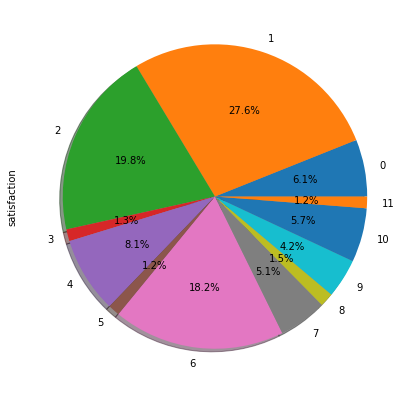

In [27]:
data.groupby('department')['satisfaction'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(7,7))

<AxesSubplot:ylabel='satisfaction'>

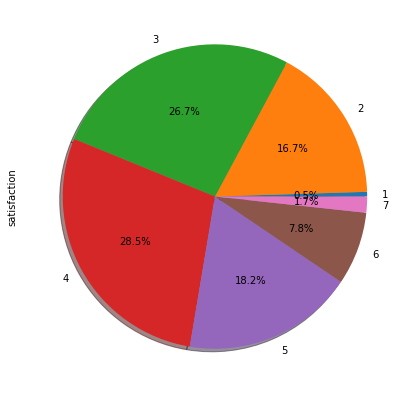

In [28]:
data.groupby('n_projects')['satisfaction'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(7,7))

<AxesSubplot:ylabel='satisfaction'>

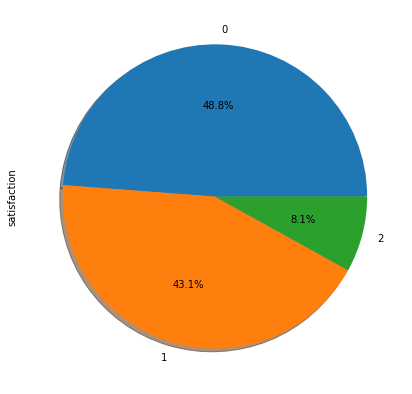

In [29]:
data.groupby('salary')['satisfaction'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(7,7))

<AxesSubplot:ylabel='satisfaction'>

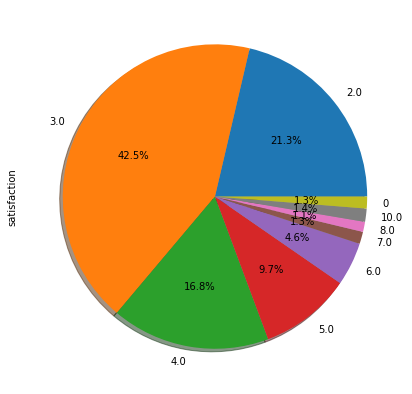

In [30]:
data.groupby('tenure')['satisfaction'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(7,7))

<AxesSubplot:ylabel='satisfaction'>

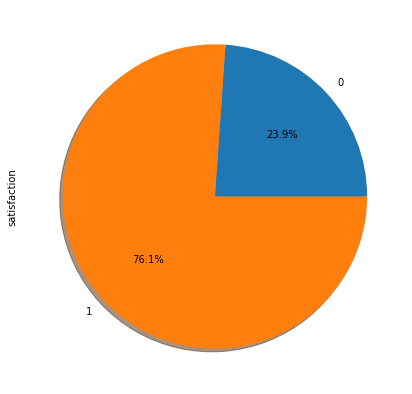

In [31]:
data.groupby('status')['satisfaction'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(7,7))

In [32]:
data.corr().head()

,avg_monthly_hrs,department,n_projects,salary,status,age,rating,salary.1,EmployeeName,Agency,fname,lname
avg_monthly_hrs,1.000000,0.011608,0.443610,-0.003195,-0.071353,-0.007499,0.011793,0.003059,-0.000813,-0.000813,-0.000813,-0.000813
department,0.011608,1.000000,0.017205,0.076104,0.025027,0.001865,-0.007111,-0.014313,-0.004502,-0.004502,-0.004502,-0.004502
n_projects,0.443610,0.017205,1.000000,-0.002306,-0.025639,-0.002988,0.001304,-0.006375,-0.006651,-0.006651,-0.006651,-0.006651
salary,-0.003195,0.076104,-0.002306,1.000000,0.155476,-0.004528,0.018247,0.000365,0.008272,0.008272,0.008272,0.008272
status,-0.071353,0.025027,-0.025639,0.155476,1.000000,-0.011951,0.012489,-0.004311,0.003536,0.003536,0.003536,0.003536


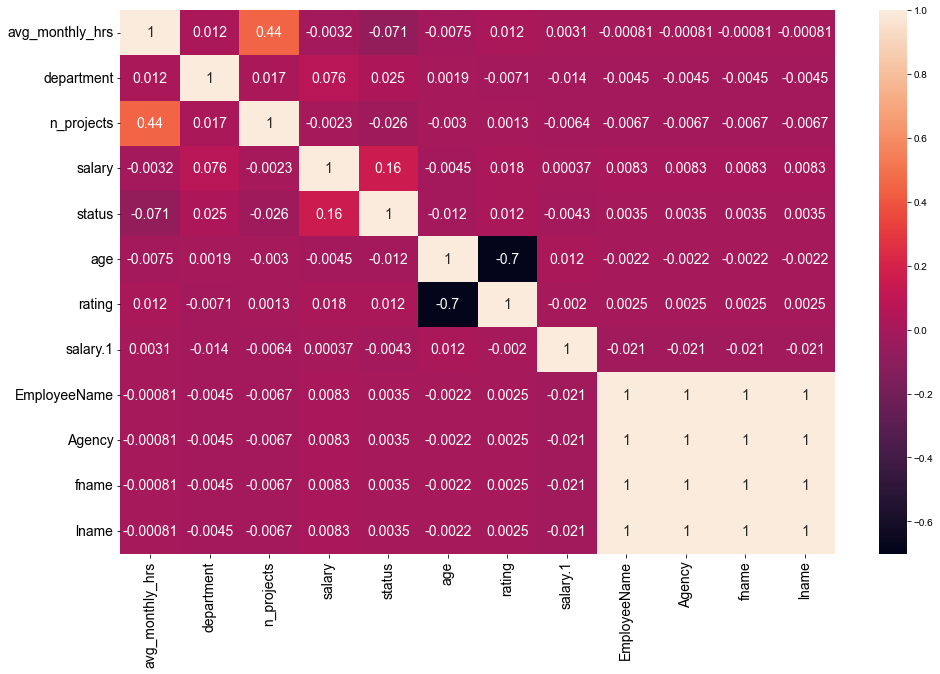

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

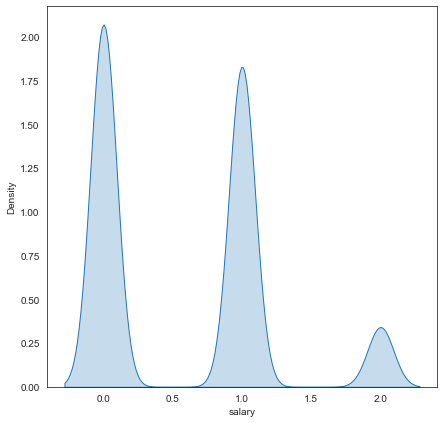

In [34]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['salary'],shade=True)
plt.show()

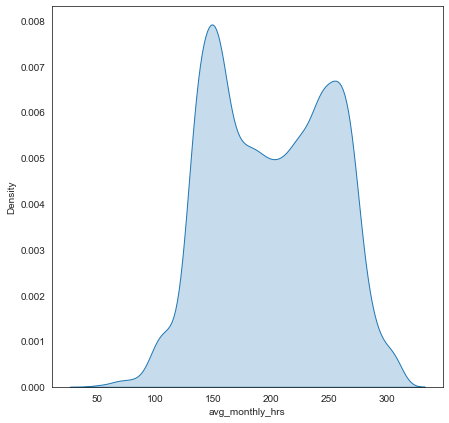

In [35]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['avg_monthly_hrs'],shade=True)
plt.show()

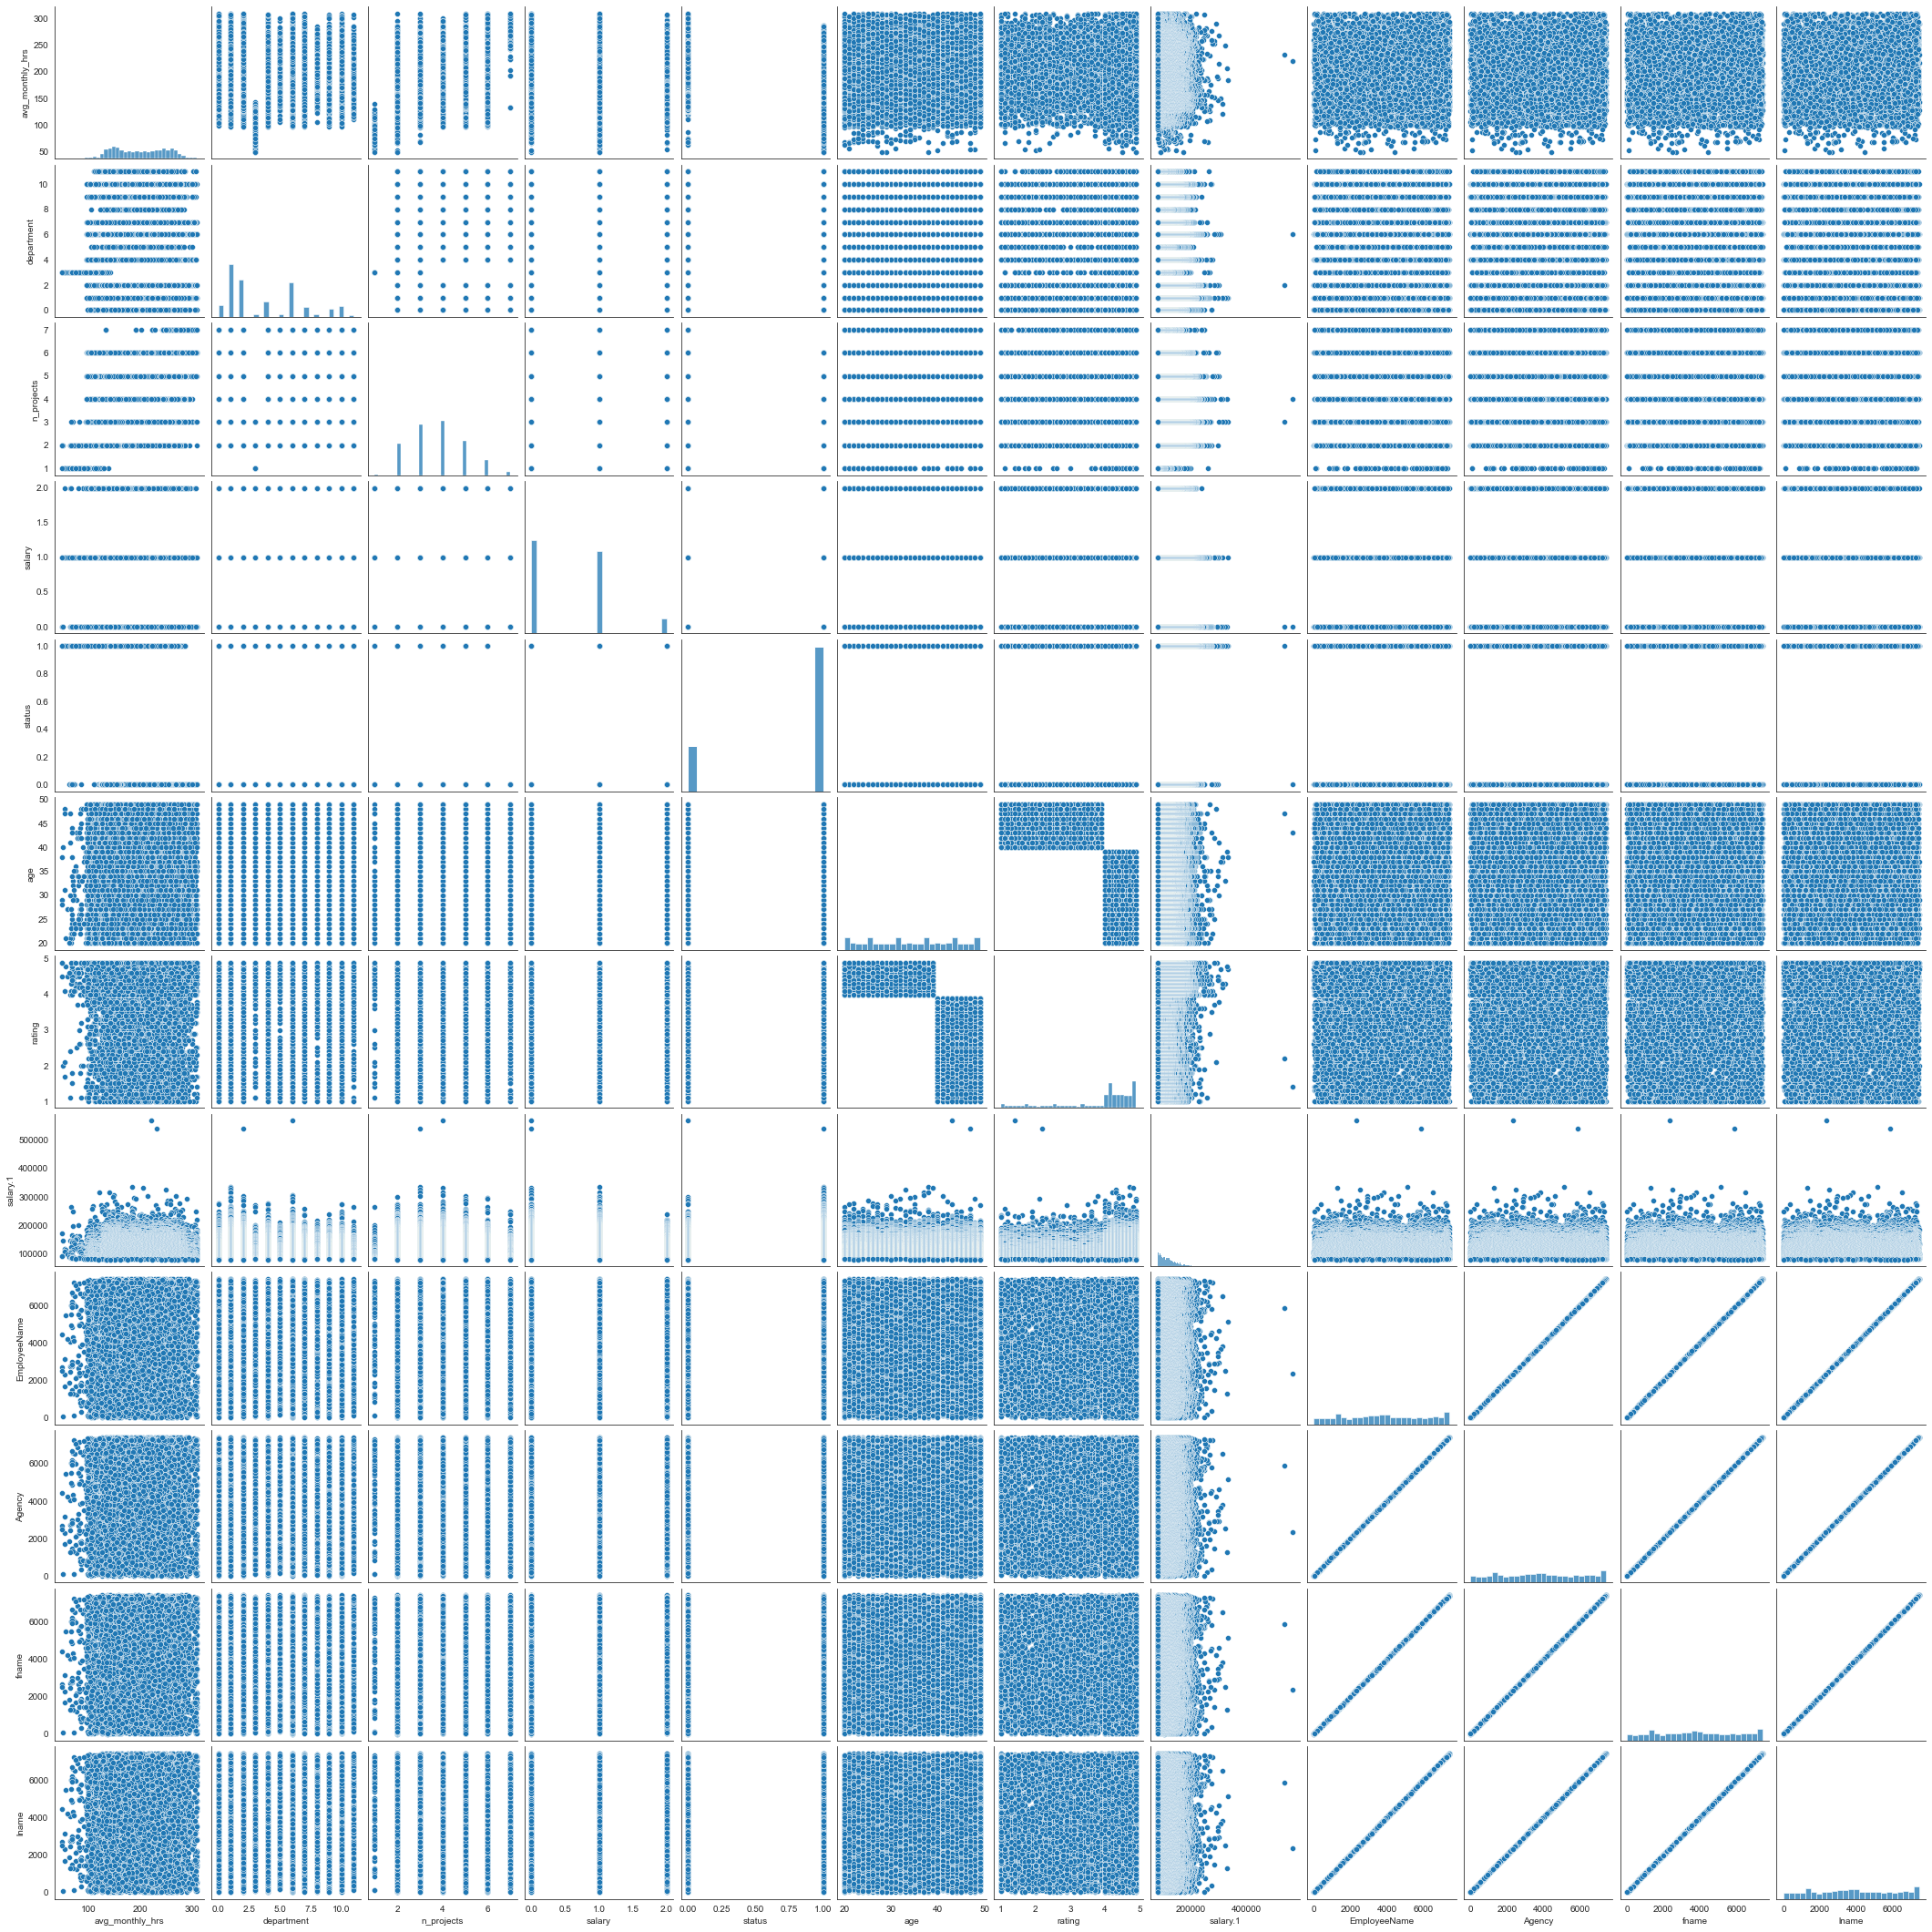

In [36]:
sns.pairplot(data)

In [37]:
data = data.drop(['Agency'],axis=1)

In [38]:
data = data.drop(['EmployeeName'],axis=1)

In [39]:
data = data.drop(['fname'],axis=1)

In [40]:
data=data.drop(['lname'],axis=1)

In [41]:
data = data.drop(['avg_monthly_hrs'],axis=1)

In [42]:
data = data.drop(['last_evaluation'],axis=1)

In [43]:
data.head()

,department,n_projects,salary,satisfaction,status,tenure,age,rating,salary.1
0,6,4,0,0.829896,0,5.0,43,1.4,567595
1,2,3,0,0.834544,1,2.0,47,2.2,538909
2,1,3,1,0.834988,1,3.0,38,4.7,335279
3,1,4,0,0.424764,1,2.0,39,4.8,332343
4,1,3,0,0.779043,1,3.0,33,4.3,326373


In [44]:
target = np.array(data.drop(['satisfaction'],1))
features = np.array(data['satisfaction'])

In [45]:
target[0]

array([6, 4, 0, 0, 5.0, 43, 1.4, 567595], dtype=object)

In [46]:
x_train , x_test , y_train , y_test = train_test_split(target,features,test_size=0.25,random_state=42)

len(x_train)/len(features)

0.7499821415815415

In [47]:
print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of y_test is {y_test.shape}')

Shape of x_train is (10499, 8)
Shape of x_test is (3500, 8)
Shape of y_train is (10499,)
Shape of y_test is (3500,)


In [48]:
rf_model = RandomForestRegressor(random_state = 42).fit(x_train, y_train)


In [49]:
y_pred = rf_model.predict(x_test)
rf_base = np.sqrt(mean_squared_error(y_test, y_pred))
rf_base

0.18998153914443505

In [50]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [51]:
cart_model = DecisionTreeRegressor()
cart_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [52]:
y_pred = cart_model.predict(x_test)
cart_base = np.sqrt(mean_squared_error(y_test, y_pred))
cart_base

0.2597849209876179

In [53]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x_train)
lr_poly_regressor = LinearRegression()
lr_poly_regressor.fit(X_poly, y_train)

# Predicting Test Set
y_pred = lr_poly_regressor.predict(poly_reg.fit_transform(x_test))


In [55]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Polynomial Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)

# Predicting Test Set
y_pred = dt_regressor.predict(x_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [57]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=0)
rf_regressor.fit(x_train,y_train)

# Predicting Test Set
y_pred = rf_regressor.predict(x_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [58]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(x_train, y_train)

# Predicting Test Set
y_pred = xgb_regressor.predict(x_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['XGB Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [59]:
##Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Predicting Test Set
y_pred = gb_regressor.predict(x_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoosting Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [60]:
## Ada Boosting
from sklearn.ensemble import AdaBoostRegressor
ad_regressor = AdaBoostRegressor()
ad_regressor.fit(x_train, y_train)

# Predicting Test Set
y_pred = ad_regressor.predict(x_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['AdaBoost Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [61]:
#The Best Classifier
print('The best regressor is:')
print('{}'.format(results.sort_values(by='R2 Score',ascending=False).head(5)))

The best regressor is:
                        Model       MAE       MSE      RMSE  R2 Score
5  GradientBoosting Regressor  0.141058  0.034189  0.184903  0.475923
3    Random Forest Regression  0.142795  0.036015  0.189775  0.447940
4               XGB Regressor  0.146299  0.036094  0.189985  0.446717
6          AdaBoost Regressor  0.152004  0.036736  0.191667  0.436878
1       Polynomial Regression  0.158522  0.040441  0.201101  0.380083


In [62]:
import pickle
pickle.dump(gb_regressor,open('employee_satisfaction_1.pkl','wb'))

In [63]:
model = pickle.load(open('employee_satisfaction_1.pkl','rb'))

In [64]:
print(gb_regressor.predict([[6,4,0,1,5,43,1.4,567695]]))

[0.6477293]


In [65]:
print(gb_regressor.predict([[5,2,0,1,2,23,3.4,367695]]))

[0.66054027]


In [70]:
print(gb_regressor.predict([[1,1,0,0,2,33,4.4,347695]]))

[0.44745204]


In [73]:
print('Satisfaction index of the employee is:',gb_regressor.predict([[4,4,0,2,2,23,4.4,747695]]))

Satisfaction index of the employee is: [0.77184584]


In [79]:
print('Satisfaction index of the employee is:',gb_regressor.predict([[4,8,0,0,1,23,1.4,47695]]))

Satisfaction index of the employee is: [0.32307662]
